## Final Project Submission

Please fill out:
* Student names: Edwin korir, Maryan Daud, Sarah Njoroge, Daniel Mutiso
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Brian Chacha
* Blog post URL: N/a


# Wakanda Movies Studio Needs Analysis

![Movies](Readme_images\Wakanda_image.jpg)

## Overview

This project explores and analyses movie data from different sources to generate insights on trends, rating, audience reception, correlations and perfomances for a business stakeholder. The Wakanda Movie Studio can use this analysis to decide on the best approach on producing, marketing and managing movies.

## Business Problem

Our company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of this company's new movie studio can use to help decide what type of films to create.

![movie](Readme_images\movie_logos.jpg)

## Objectives
* What is the most profitable movie genre

* What is the ideal production budget to produce a successful movie

* Which type of movie has the highest ratings

* Does the movie runtime influence the success of a movie

## Data Understanding

We have datasets from different sources:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

Every movie is unique in its way and with the above data we are going to load and explore it to have a closer look at the features.

### Import the neccessary libraries

In [3]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from zipfile import ZipFile


### Start by loading and understanding the datasets

## 1. Box Office Mojo Dataset

In [4]:
# Load the data 
bom_data = pd.read_csv(r'C:\Users\danmu\Documents\Flatiron\MyProjects\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv.gz')
bom_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#check Box office mojo data info
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#check the first five
bom_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
#  View the last five columns
bom_data.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [8]:
# Checking for missing, and duplicated values using a function
def movie_info(data):
  print(f'The shape of the dataset: {data.shape}')
  print(f'The number of missing values: {data.isnull().sum().sum()}')
  print(f'The number of duplicated values {data.duplicated().sum()}')
  print(f'The number of unique values: {data.nunique().sum()}')

movie_info(bom_data)

The shape of the dataset: (3387, 5)
The number of missing values: 1383
The number of duplicated values 0
The number of unique values: 6653


In [9]:
# view the statistics of the data
bom_data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = bom_data.isnull().mean() * 100
print(missing_percentage)

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


### *Interpretation*


- The above information shows that three columns have missing values.
- `Foreign_gross` has the highest percentage of approximately 40%, followed by `domestic_gross` with 0.83% then `studio` with 0.15%

*Solution*

* `Foreign_gross` and `domestic_gross` columns fill with mean while `studio` drop the missing values


### Handling missing values in this dataset

In [11]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Fill missing values in 'foreign_gross' and 'domestic_gross' with their respective means
bom_data['foreign_gross'] = pd.to_numeric(bom_data['foreign_gross'], errors='coerce')
bom_data['foreign_gross'].fillna(bom_data['foreign_gross'].mean(), inplace=True)
bom_data['domestic_gross'].fillna(bom_data['domestic_gross'].mean(), inplace=True)

# Drop rows with missing values in 'studio' column
bom_data.dropna(subset=['studio'], inplace=True)

In [12]:
# Confirms data is cleaned
bom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


* The data is cleaned appropriately

## 2. Rotten Tomatoes Dataset

In [13]:
# LOAD THE DATASET USING PANDAS
# open rotten tomatoes tsv
rt_data = pd.read_csv(r"C:\Users\danmu\Documents\Flatiron\MyProjects\dsc-phase-2-project-v3\zippedData\rt.movie_info.tsv.gz", sep='\t')
rt_data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
# VIEW THE DATASET INFO
rt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


- Above here there lots of missing data, so we drop currency, box office and studio

In [15]:
# dropping the columns 
rt_data.drop(columns=['box_office', 'currency', 'studio'], inplace=True)

In [16]:
# Confirm data is cleaned
rt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   runtime       1530 non-null   object
dtypes: int64(1), object(8)
memory usage: 109.8+ KB


In [17]:
# Using the function created above find the number of missing values
movie_info(rt_data)

The shape of the dataset: (1560, 9)
The number of missing values: 1469
The number of duplicated values 0
The number of unique values: 7440


In [18]:
# Calculate missing percentage per column
missing_percentage = rt_data.isnull().mean() * 100
print(missing_percentage)

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
runtime          1.923077
dtype: float64


In [19]:
# dropping missing values
rt_data.dropna(axis=0, inplace=True)

In [ ]:
# Check the first 10 entries
rt_data.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",82 minutes
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",123 minutes
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",117 minutes
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",108 minutes
13,20,Rachel (Britt Ekland) is an Amish girl who rej...,PG-13,Classics|Comedy|Drama,William Friedkin,Sidney Michaels|Arnold Schulman|Norman Lear,"Dec 22, 1968","May 20, 2008",97 minutes


In [ ]:
# Cleaning the data on runtime removing the string object 
rt_data['runtime'] = rt_data['runtime'].str.replace('minutes', '', regex=True)
rt_data['runtime']

0       104 
1       108 
2       116 
3       128 
5        95 
        ... 
1545     98 
1550    112 
1552    116 
1556     88 
1558    101 
Name: runtime, Length: 881, dtype: object

In [22]:
# convert the runtime to numeric
rt_data['runtime'] = pd.to_numeric(rt_data['runtime'])
rt_data

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95
...,...,...,...,...,...,...,...,...,...
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",98
1550,1990,A hard-working Sicilian heads for Switzerland ...,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,"Jun 1, 1974","May 2, 2005",112
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",116
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88


In [23]:
# confirm data is clean
rt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            881 non-null    int64 
 1   synopsis      881 non-null    object
 2   rating        881 non-null    object
 3   genre         881 non-null    object
 4   director      881 non-null    object
 5   writer        881 non-null    object
 6   theater_date  881 non-null    object
 7   dvd_date      881 non-null    object
 8   runtime       881 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 68.8+ KB


## 3. Rotten Tomatoes Review Dataset

In [24]:
#load rotten tomatoes review
rt_reviews = pd.read_csv(r"C:\Users\danmu\Documents\Flatiron\MyProjects\dsc-phase-2-project-v3\zippedData\rt.reviews.tsv.gz", sep='\t', encoding= 'latin-1', encoding_errors='ignore')
rt_reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [ ]:
# Check the data values counts
rt_reviews['rating'].value_counts()

rating
3/5       4327
4/5       3672
3/4       3577
2/5       3160
2/4       2712
          ... 
3.1/5        1
6.2/10       1
2.6/5        1
9.7          1
3 1/2        1
Name: count, Length: 186, dtype: int64

In [ ]:
# View the Data
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
# Change the rating column entries to numeric
rt_reviews['rating']= pd.to_numeric(rt_reviews['rating'], errors = 'coerce')


In [ ]:
# Check the unique values
rt_reviews['rating'].unique()

array([nan, 8. , 6. , 7. , 3. , 2.5, 9. , 1. , 5. , 0. , 2. , 4.5, 7.7,
       3.5, 2.7, 5.8, 4. , 4.9, 1.5, 2.2, 7.3, 3.2, 4.2, 8.4, 1.8, 8.9,
       1.7, 7.9, 6.7, 5.2, 5.9, 3.7, 4.7, 8.2, 3.4, 9.7, 7.4, 4.8, 9.2,
       3.1, 7.8, 6.2, 3.3, 9.8, 8.5, 4.1, 7.1])

In [ ]:
# Drop missing values
rt_reviews.dropna(inplace=True)

In [ ]:
# confirm the data is clean by calculating the percentage of missing values
rt_reviews.isnull().sum() / len(rt_reviews) * 100

id            0.0
review        0.0
rating        0.0
fresh         0.0
critic        0.0
top_critic    0.0
publisher     0.0
date          0.0
dtype: float64

- The `rating` column is the most important in this dataset
- The data is clean and standardized for use

## 4. The Movies Dataset

In [31]:
#load the movies db
tmdb_data = pd.read_csv(r"C:\Users\danmu\Documents\Flatiron\MyProjects\dsc-phase-2-project-v3\zippedData\tmdb.movies.csv.gz", index_col=0)
tmdb_data.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [32]:
# Display the shape of the data
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


- This dataset is clean, no missing values

In [33]:
#Display the statistics of the data
tmdb_data.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


## VISUALIZATION

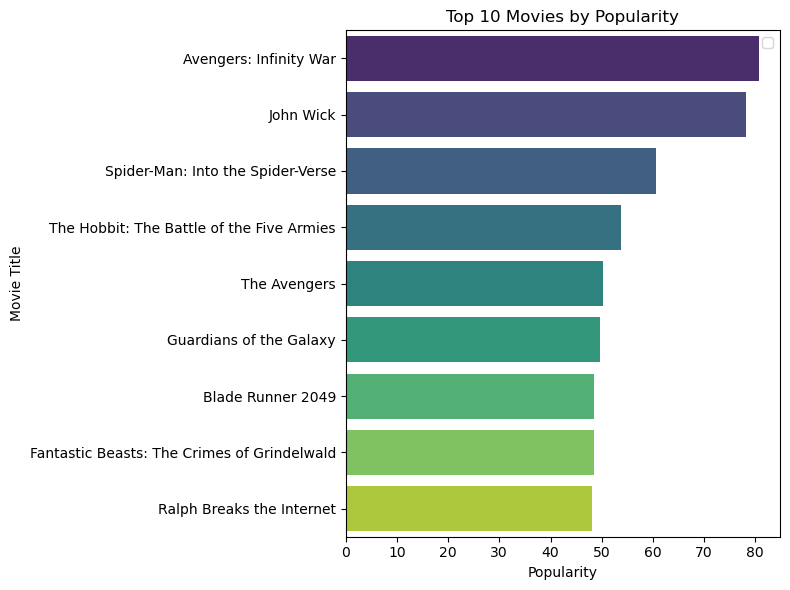

In [34]:
# Plotting the top 10 movies by popularity
top_10_popular_movies = tmdb_data.nlargest(10, 'popularity')

plt.figure(figsize=(8, 6))
sns.barplot(x='popularity', y='title', data=top_10_popular_movies, palette='viridis')
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.legend()
plt.show()

*Insights*

- The most popular movies are from the science fiction/Fantasy genre

### Visualization of movie production per year

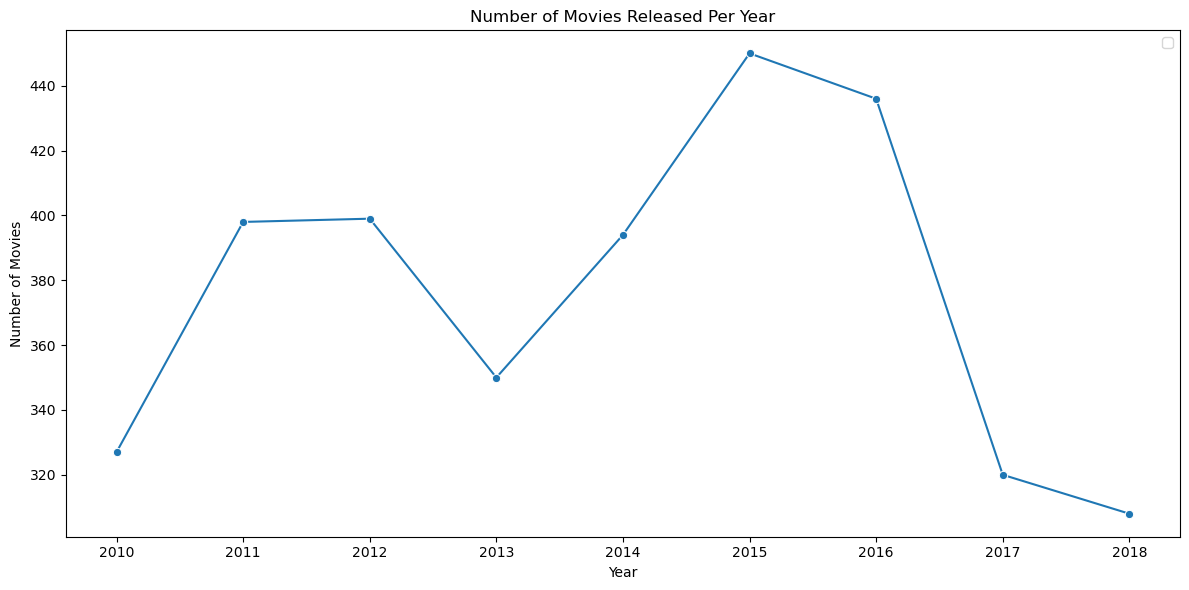

In [35]:
# Calculate the number of movies released per year
movies_per_year = bom_data['year'].value_counts().sort_index()

# Plotting the number of movies released per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_per_year, marker = 'o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.tight_layout()
plt.show()

*Insights*
* The number of movies production varies from year to year
* The decline in movie production after every two years
* Peak production in the year 2015

## 5. The Numbers Dataset

In [36]:
# load the numbers movie budget
tn_budget = pd.read_csv(r"C:\Users\danmu\Documents\Flatiron\MyProjects\dsc-phase-2-project-v3\zippedData\tn.movie_budgets.csv.gz")
tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


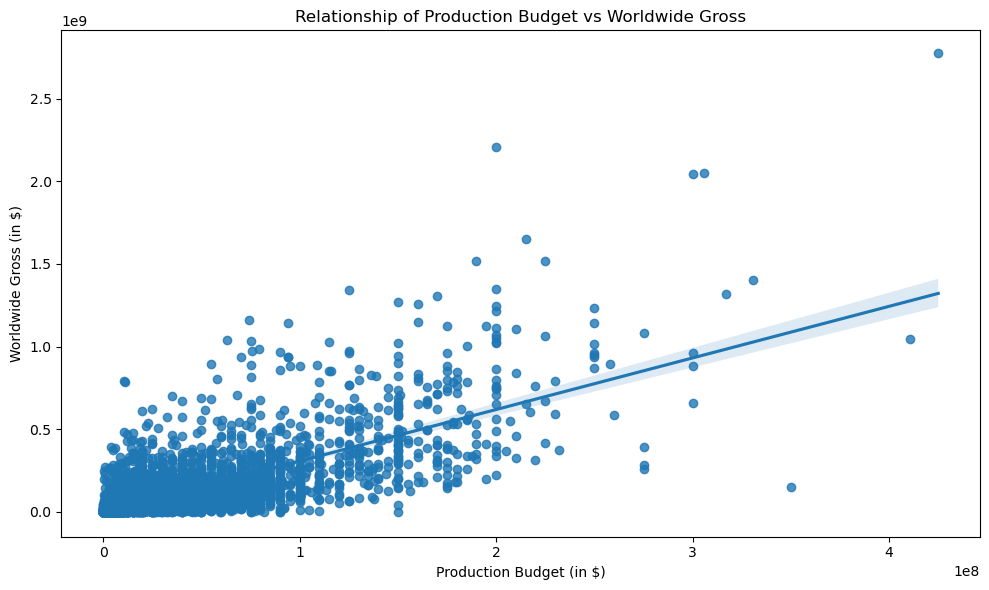

In [37]:
# Visualizing tha dataset
# Convert columns to numeric for analysis 
tn_budget['production_budget'] = tn_budget['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_budget['domestic_gross'] = tn_budget['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_budget['worldwide_gross'] = tn_budget['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Plot the relationship between production budget and worldwide gross
plt.figure(figsize=(10, 6))
sns.regplot(data=tn_budget, x='production_budget', y='worldwide_gross')
plt.title('Relationship of Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget (in $)')
plt.ylabel('Worldwide Gross (in $)')
plt.tight_layout()
plt.show()

*Insights*

- There is a positive linear relationship
- The higher the production budget the higher the worldwide gross

In [38]:
# View the data
tn_budget.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


## 6. The IMDB Dataset

In [ ]:
# import sqlite3 to connect to the database
import sqlite3
import os

# Connect to the IMDB database

conn = sqlite3.connect(r'C:\Users\danmu\Documents\Flatiron\MyProjects\dsc-phase-2-project-v3\zippedData\im.db\im.db')

# create cursor
cursor = conn.cursor()

# Check the tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# View the tables
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [40]:
# View the MOvie_basics table
movie_basics_df = pd.read_sql(""" 
SELECT * FROM movie_basics
GROUP BY start_year  
ORDER BY start_year ASC                                                  
LIMIT 5;
                              
""", conn)

movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama
1,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
2,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
4,tt0329539,Rice Girl,Rice Girl,2014,95.0,"Adventure,Comedy,Romance"


In [ ]:
# Print the data information
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         5 non-null      object 
 1   primary_title    5 non-null      object 
 2   original_title   5 non-null      object 
 3   start_year       5 non-null      int64  
 4   runtime_minutes  4 non-null      float64
 5   genres           5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 372.0+ bytes


In [42]:
# Create a movie_basics_year df for the year and count of movies
movie_basics_genres = movie_basics_df['genres'].value_counts().sort_values(ascending=False).to_frame

movie_basics_genres


<bound method Series.to_frame of genres
Drama                       1
Animation,Drama,History     1
Documentary,History         1
Action,Crime,Drama          1
Adventure,Comedy,Romance    1
Name: count, dtype: int64>

In [43]:
# Movie ratings table
movie_ratings_df = pd.read_sql(""" 
SELECT * FROM movie_ratings;                         
""", conn)

movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## Merge the datasets

*Merge datasets on relevant columns*

In [44]:
# Merge datasets using SQL
query = """
SELECT 
    mb.movie_id,  
    mb.start_year, 
    mb.runtime_minutes, 
    mb.genres, 
    mr.averagerating, 
    mr.numvotes, 
    ma.region,  
    ma.types, 
    ma.attributes, 
    ma.is_original_title
FROM 
    movie_basics as mb
LEFT JOIN 
    movie_ratings as mr 
ON 
    mb.movie_id = mr.movie_id
LEFT JOIN 
    movie_akas as ma 
ON 
    mb.movie_id = ma.movie_id;
"""

# Execute the query and store the result in a DataFrame
merged_data = pd.read_sql(query, conn)

# Display the first few rows of the merged dataset
merged_data.head(10)

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,region,types,attributes,is_original_title
0,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77.0,None,original,None,1.0
1,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77.0,IN,None,None,0.0
2,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77.0,IN,None,alternative spelling,0.0
3,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77.0,IN,None,alternative transliteration,0.0
4,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77.0,IN,None,alternative transliteration,0.0
5,tt0066787,2019,114.0,"Biography,Drama",7.2,43.0,None,None,None,0.0
6,tt0066787,2019,114.0,"Biography,Drama",7.2,43.0,None,original,None,1.0
7,tt0066787,2019,114.0,"Biography,Drama",7.2,43.0,IN,None,None,0.0
8,tt0066787,2019,114.0,"Biography,Drama",7.2,43.0,XWW,None,None,0.0
9,tt0069049,2018,122.0,Drama,6.9,4517.0,None,original,None,1.0


In [ ]:
# Check the percentage of missing values per column
merged_data.isnull().sum() / len(merged_data) * 100

movie_id              0.000000
start_year            0.000000
runtime_minutes      11.623283
genres                1.874024
averagerating        25.161372
numvotes             25.161372
region               21.694863
types                52.622875
attributes           95.802219
is_original_title     6.712793
dtype: float64

### Handling missing values for this merged data
Drop columns with  with more than 50%  missing values
 * These are attributes, region and types 

In [46]:
# dropping columns
merged_data.drop(columns=['attributes', 'types', 'region'], axis =1 , inplace=True)

In [ ]:
# View data info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355545 entries, 0 to 355544
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           355545 non-null  object 
 1   start_year         355545 non-null  int64  
 2   runtime_minutes    314219 non-null  float64
 3   genres             348882 non-null  object 
 4   averagerating      266085 non-null  float64
 5   numvotes           266085 non-null  float64
 6   is_original_title  331678 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 19.0+ MB


###  Merge 3 datasets for Analysis

In [49]:
# We merge rotten tomatoes reviews and the numbers dataset on id

merged_df = pd.merge(pd.merge(rt_reviews, tn_budget, on='id'), rt_data, on='id')
merged_df




,id,review,rating_x,fresh,critic,top_critic,publisher,date,release_date,movie,...,domestic_gross,worldwide_gross,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,runtime
0,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012","Jun 7, 2019",Dark Phoenix,...,42762350.0,149762350.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108
1,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012","Nov 21, 2018",Ralph Breaks The Internet,...,201091711.0,524283695.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108
2,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012","Apr 8, 2005",Sahara,...,68671925.0,121671925.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108
3,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012","Oct 5, 2018",Venom,...,213511408.0,853628605.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108
4,3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012","Feb 18, 2005",Son of the Mask,...,17018422.0,59918422.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,95,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016","Mar 19, 1999",Sparkler,...,5494.0,5494.0,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116
1732,95,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016","Jan 26, 2010",B-Girl,...,0.0,1160.0,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116
1733,95,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016","Mar 31, 2006",Brick,...,2075743.0,4243996.0,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116
1734,95,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016","Nov 10, 2009",Ink,...,0.0,0.0,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116


In [ ]:
# Data information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1736 non-null   int64  
 1   review             1736 non-null   object 
 2   rating_x           1736 non-null   float64
 3   fresh              1736 non-null   object 
 4   critic             1736 non-null   object 
 5   top_critic         1736 non-null   int64  
 6   publisher          1736 non-null   object 
 7   date               1736 non-null   object 
 8   release_date       1736 non-null   object 
 9   movie              1736 non-null   object 
 10  production_budget  1736 non-null   float64
 11  domestic_gross     1736 non-null   float64
 12  worldwide_gross    1736 non-null   float64
 13  synopsis           1736 non-null   object 
 14  rating_y           1736 non-null   object 
 15  genre              1736 non-null   object 
 16  director           1736 

## Univariate Analysis

Explore each column separately to view the distribution and descriptive statistics

### 1.0 Rating_x

In [51]:
merged_df['rating_x'].value_counts()

rating_x
1.0    405
8.0    404
6.0    348
3.0    116
2.5     58
7.0     58
0.0     58
4.5     58
9.0     58
7.7     58
2.0     58
3.5     57
Name: count, dtype: int64

In [75]:
# summary statistics
merged_df['rating_x'].describe()

count    1736.000000
mean        4.705703
std         2.924380
min         0.000000
25%         1.000000
50%         6.000000
75%         8.000000
max         9.000000
Name: rating_x, dtype: float64

### Visualization of rating_x


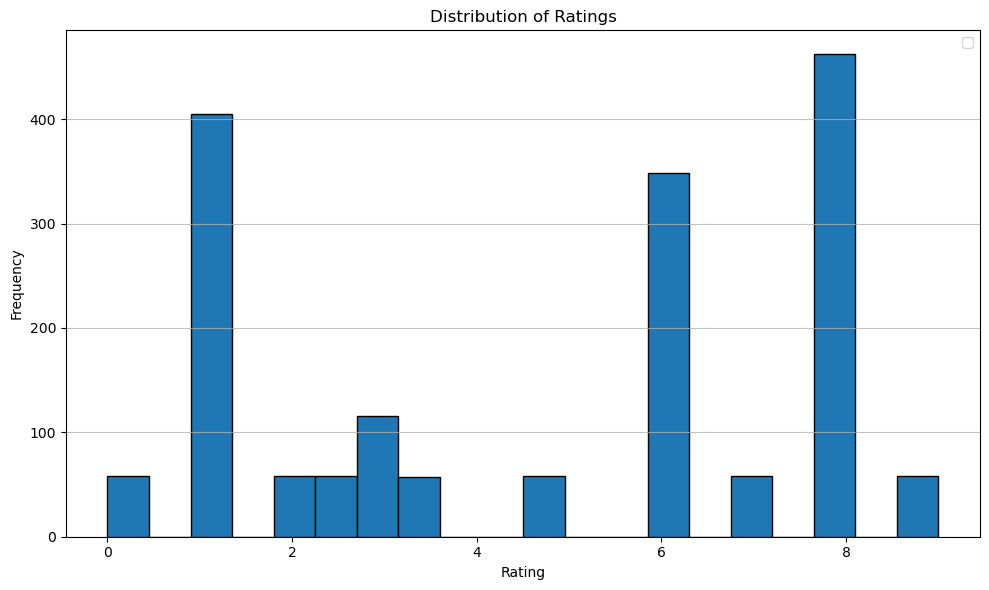

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['rating_x'], bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha = 0.75)
plt.tight_layout()
plt.legend()
plt.show()

*Insights*
* Ratings 1, 6 and 8 are the most frequent rating

### 1.1 Runtime

In [76]:
# Runtime summary statistics
merged_df['runtime']

0       108
1       108
2       108
3       108
4       108
       ... 
1731    116
1732    116
1733    116
1734    116
1735    116
Name: runtime, Length: 1736, dtype: int64

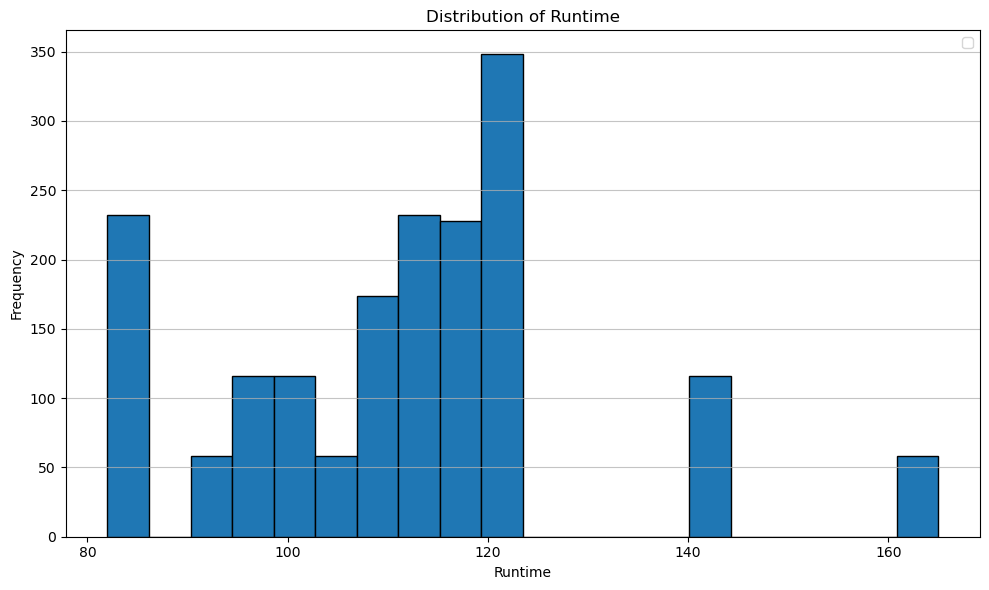

In [53]:
# Runtime visualization
plt.figure(figsize=(10, 6))
plt.hist(merged_df['runtime'], bins=20, edgecolor='black')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha = 0.75)
plt.tight_layout()
plt.legend()
plt.show()

*Insights*
* Optimal runtime is less than 120 minutes

### 1.2 Genre

In [ ]:
# Genre value count
merged_df['genre'].value_counts()

genre
Drama                                                                   232
Action and Adventure|Mystery and Suspense                               232
Comedy|Drama                                                            232
Comedy                                                                  174
Art House and International|Drama|Musical and Performing Arts           171
Action and Adventure                                                    116
Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance         116
Drama|Science Fiction and Fantasy                                        58
Art House and International|Comedy|Drama|Musical and Performing Arts     58
Comedy|Musical and Performing Arts                                       58
Mystery and Suspense                                                     58
Comedy|Romance                                                           58
Action and Adventure|Classics|Drama                                      58
Action

In [77]:
# statistics of genre
merged_df['genre'].describe()

count      1736
unique       15
top       Drama
freq        232
Name: genre, dtype: object

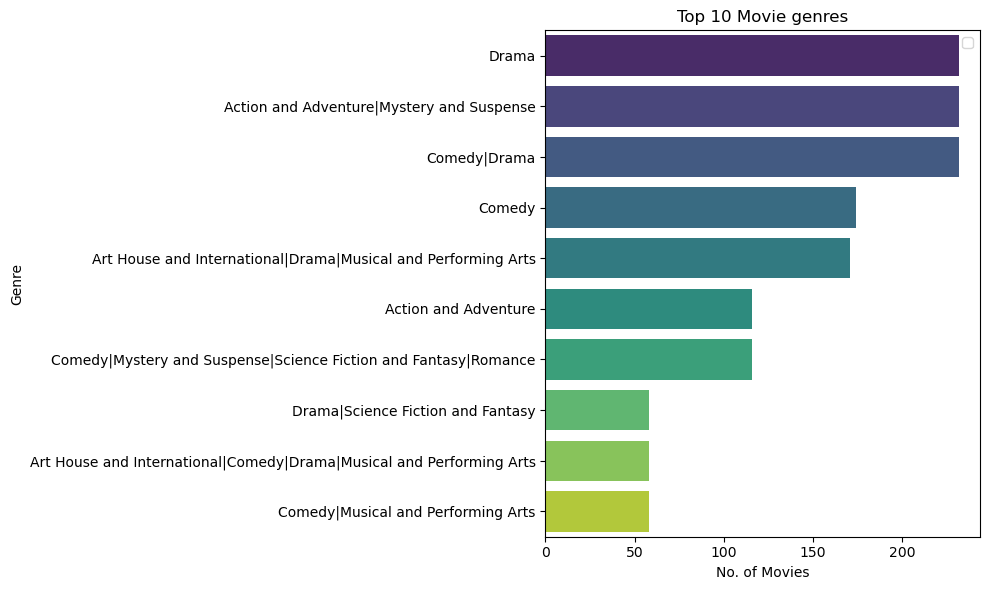

In [78]:
# VISUALIZATION USING A BAR GRAPH
genre_counts =merged_df['genre'].value_counts()
 
# top ten genres 
top_genres = 10
count_top_genres = genre_counts.head(top_genres)
plt.figure(figsize=(10, 6))
sns.barplot(x=count_top_genres.values, y=count_top_genres.index, palette='viridis')
plt.title('Top 10 Movie genres')
plt.xlabel('No. of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.legend()
plt.show()


*Insights*
- The most watched genre is drama, action and Adventure | Mystery and suspense, Comedy|Drama
- The second watched is Comedy
- Art House and International|Drama|Musical and Performing Arts follow closely

## Most common genre by percentage

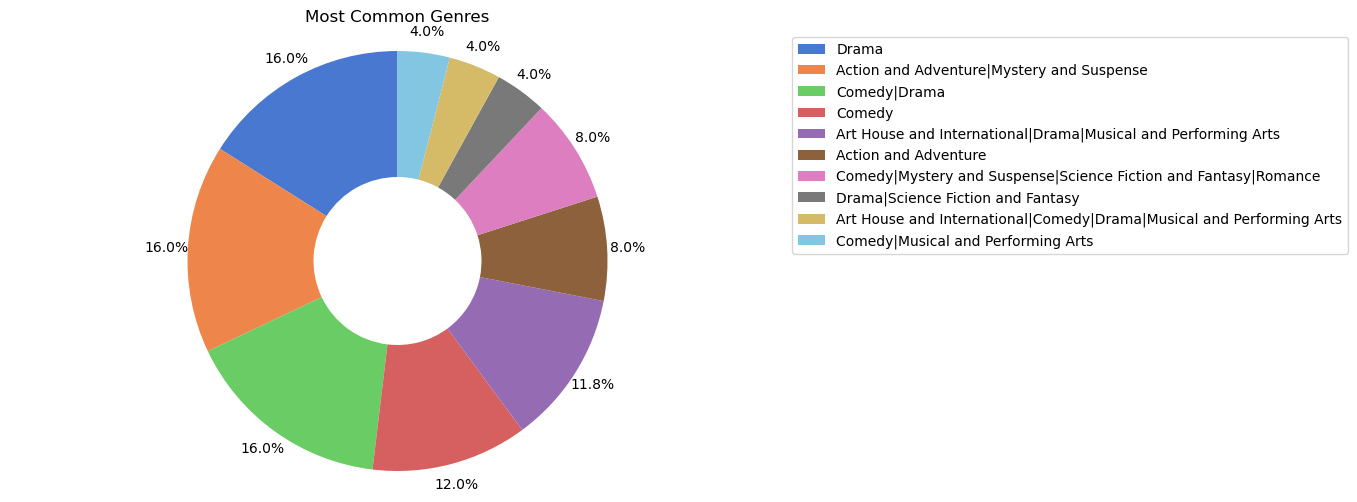

In [79]:
# A pie chart to visualize peercentage
most_common_genres = merged_df['genre'].value_counts().head(10)

# Visualizing using pie chart
plt.figure(figsize=(10, 6))
plt.pie(most_common_genres.values, autopct='%1.1f%%', pctdistance=1.1, startangle=90, colors=sns.color_palette('muted'), wedgeprops={'width': 0.6})
plt.title('Most Common Genres')
plt.axis('equal')
plt.legend(labels=most_common_genres.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

*Insights*
- The most watched genre is drama, action and Adventure | Mystery and suspense, Comedy|Drama
- The second watched is Comedy
- Art House and International|Drama|Musical and Performing Arts follow closely

In [57]:
# Checking the summary statistics
merged_df.describe()

,id,rating_x,top_critic,production_budget,domestic_gross,worldwide_gross,runtime
count,1736.000000,1736.000000,1736.000000,1.736000e+03,1.736000e+03,1.736000e+03,1736.000000
mean,52.750000,4.705703,0.033410,3.139721e+07,4.071061e+07,8.768151e+07,111.922235
std,26.950285,2.924380,0.179757,4.123316e+07,6.489019e+07,1.627522e+08,18.276621
min,3.000000,0.000000,0.000000,1.100000e+03,0.000000e+00,0.000000e+00,82.000000
25%,34.000000,1.000000,0.000000,5.000000e+06,1.190003e+06,3.561524e+06,99.000000
50%,54.000000,6.000000,0.000000,1.700000e+07,1.767482e+07,3.116631e+07,113.000000
75%,77.000000,8.000000,0.000000,4.000000e+07,5.233011e+07,9.208846e+07,123.000000
max,95.000000,9.000000,1.000000,3.500000e+08,6.522706e+08,1.648855e+09,165.000000


In [58]:
# convert worldwide to numeric
merged_df['worldwide_gross'] = pd.to_numeric(merged_df['worldwide_gross'], errors= 'coerce')

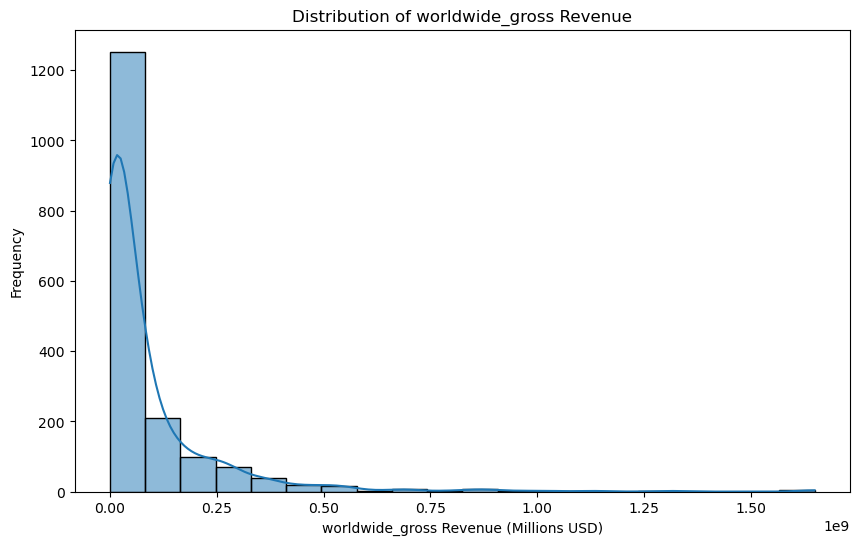

In [59]:
# Distribution of movies gross revenue
merged_df['worldwide_gross']


plt.figure(figsize=(10, 6))
sns.histplot(merged_df['worldwide_gross'], bins=20, kde=True, edgecolor='black')
plt.title('Distribution of worldwide_gross Revenue')
plt.xlabel('worldwide_gross Revenue (Millions USD)')
plt.ylabel('Frequency')
plt.show()

*Insights*
* The data is strongly skewed to the right - Most movies generate low worlwide gross revenue
* There is long tail indicating few movies generate high revenue
* Most movies generate low revenues and only few generate high revenue.

###  Bivariate Analysis

This is for the purpose of determining empirical relationship between two variables

In [ ]:
#Groupby and and change entries to integers
genre_revenue = merged_df.groupby('genre')['worldwide_gross'].mean().sort_values(ascending=False).reset_index().head(10)
genre_revenue['worlwide_gross'] = genre_revenue['worldwide_gross'].astype(int)
genre_revenue

,genre,worldwide_gross,worlwide_gross
0,Art House and International|Comedy|Drama|Music...,1.316875e+08,131687544
1,Comedy|Mystery and Suspense|Science Fiction an...,1.016365e+08,101636537
2,Comedy|Musical and Performing Arts,1.010347e+08,101034745
3,Action and Adventure,9.254288e+07,92542881
4,Action and Adventure|Mystery and Suspense,9.248313e+07,92483131
5,Comedy|Drama,8.824194e+07,88241939
6,Comedy,8.743847e+07,87438474
7,Drama,8.684887e+07,86848873
8,Action and Adventure|Classics|Drama,8.467420e+07,84674202
9,Comedy|Romance,8.430087e+07,84300870


*Visualization of worldwide gross by genre*

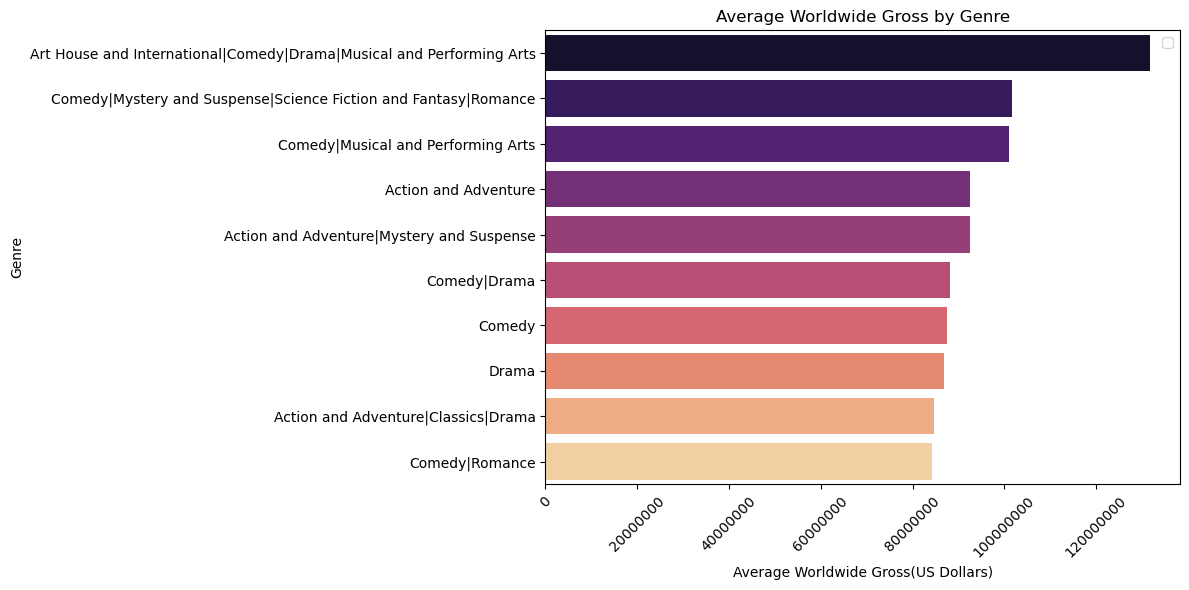

In [61]:
# VISUALIZATION
plt.figure(figsize=(12, 6))
sns.barplot(x= 'worldwide_gross', y= 'genre', data= genre_revenue, palette='magma')
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('Average Worldwide Gross(US Dollars)')
plt.ylabel('Genre')
plt.ticklabel_format(style= 'plain', axis=	'x')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.legend()
plt.show()

*Insights*
- Art House and International|Comedy|Drama|Musical and Performing Arts generates the highest revenue $131687544
- Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance and Comedy|Musical and Performing Arts follow closely
- Comedy|Romance generates the least revenue

In [80]:
# Changing entries into inetgers and grouping by genre
genre_domestic_gross = merged_df.groupby('genre')['domestic_gross'].mean().sort_values(ascending=False).reset_index().head(10)
genre_domestic_gross['domestic_gross'] = genre_domestic_gross['domestic_gross'].astype(int)
genre_domestic_gross

,genre,domestic_gross
0,Art House and International|Comedy|Drama|Music...,56951594
1,Comedy|Mystery and Suspense|Science Fiction an...,47266940
2,Action and Adventure,45168098
3,Comedy|Musical and Performing Arts,45061775
4,Action and Adventure|Mystery and Suspense,41715634
5,Comedy|Drama,41666934
6,Comedy|Romance,41287560
7,Action and Adventure|Classics|Drama,41202815
8,Art House and International|Drama|Musical and ...,40365566
9,Drama,37986590


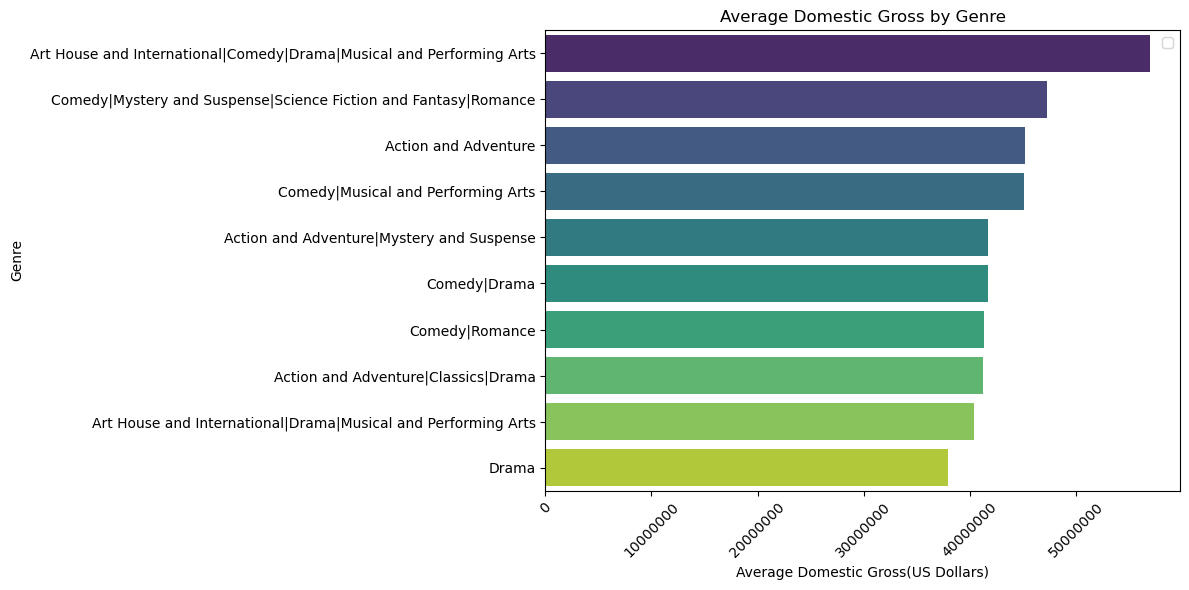

In [63]:

# VISUALIZATION OF DOMESTIC GROSS BY GENRE

plt.figure(figsize=(12, 6))
sns.barplot(x= 'domestic_gross', y= 'genre', data= genre_domestic_gross, palette='viridis')
plt.title('Average Domestic Gross by Genre')
plt.xlabel('Average Domestic Gross(US Dollars)')
plt.ylabel('Genre')
plt.ticklabel_format(style= 'plain', axis=	'x')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.legend()
plt.show()

*Insights*
- Art House and International|Comedy|Drama|Musical and Performing Arts	has the highest domestic gross revenue
- Drama has the lowest domestic gross revenue

In [ ]:
# Group production budget by genre
genre_production = merged_df.groupby('genre')['production_budget'].mean().sort_values(ascending=False).reset_index().head(10)
genre_production['production_budget'] = genre_production['production_budget'].astype(int)
genre_production

,genre,production_budget
0,Drama|Science Fiction and Fantasy,35392482
1,Comedy,33051594
2,Drama,32584879
3,Art House and International|Comedy|Drama|Music...,32513362
4,Action and Adventure|Mystery and Suspense,31942327
5,Comedy|Musical and Performing Arts,31291465
6,Mystery and Suspense,31092155
7,Comedy|Romance,30778448
8,Comedy|Drama,30501825
9,Action and Adventure,30295431


*Visualization of genre production budget*


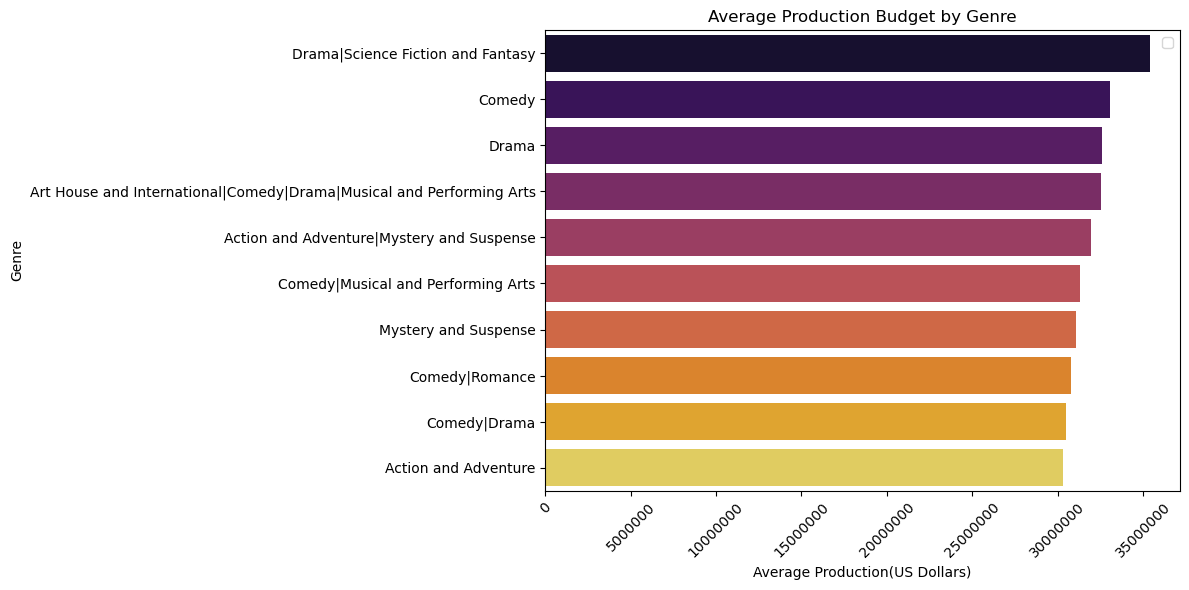

In [ ]:
# plot the visualization
plt.figure(figsize=(12, 6))
sns.barplot(x= 'production_budget', y= 'genre', data= genre_production, palette='inferno')
plt.title('Average Production Budget by Genre')
plt.xlabel('Average Production(US Dollars)')
plt.ylabel('Genre')
plt.ticklabel_format(style= 'plain', axis=	'x')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.legend()
plt.show()

*Insights*
* Drama|Science Fiction and Fantasy, Comedy and drama has the highest production budget and require significant financial investment
* Art House and International|Comedy|Drama|Musical and Performing Arts and Action and Adventure|Mystery and Suspense is relatively moderate
* Combined genres have relatively low production budgets compared to single genres

In [ ]:
# Group runtime by genre
genre_runtime = merged_df.groupby('genre')['runtime'].mean().sort_values(ascending=False).reset_index().head(10)
genre_runtime['runtime'] = genre_runtime['runtime'].astype(int)
genre_runtime

,genre,runtime
0,Action and Adventure|Classics|Drama,165
1,Action and Adventure|Mystery and Suspense,123
2,Comedy|Drama,120
3,Art House and International|Drama|Musical and ...,117
4,Drama|Sports and Fitness,116
5,Action and Adventure,115
6,Comedy|Mystery and Suspense|Science Fiction an...,113
7,Drama,111
8,Action and Adventure|Art House and Internation...,110
9,Drama|Science Fiction and Fantasy,108


*Visualization of runtime by genre*

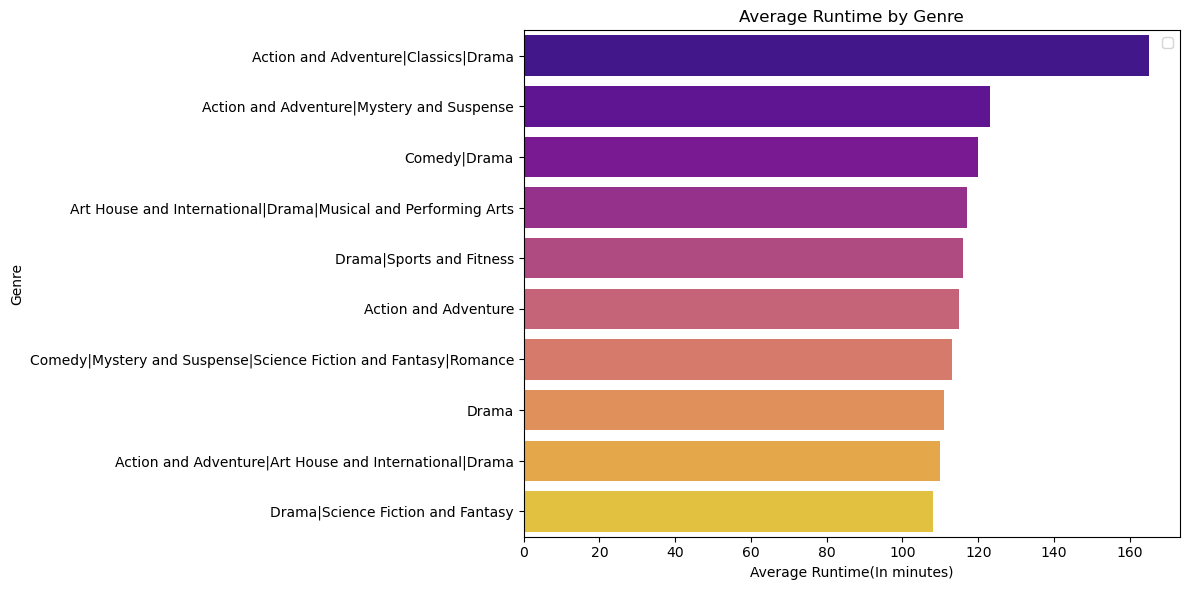

In [67]:
# plot a bar graph to visualize runtime by each genre
plt.figure(figsize=(12, 6))
sns.barplot(x= 'runtime', y= 'genre', data= genre_runtime, palette='plasma')
plt.title('Average Runtime by Genre')
plt.xlabel('Average Runtime(In minutes)')
plt.ylabel('Genre')
plt.ticklabel_format(style= 'plain', axis=	'x')
plt.tight_layout()
plt.legend()
plt.show()

*Insights*

* Action and Adventure|Classics|Drama has the longest runtime
* Action and Adventure has an average runtime
* Combination of genres has a range of average runtime


In [ ]:
# Group rating  by genre
genre_rating = merged_df.groupby('genre')['rating_x'].mean().sort_values(ascending=False).reset_index().head(10)
genre_rating['rating_x'] = genre_rating['rating_x'].astype(int)
genre_rating

,genre,rating_x
0,Comedy|Romance,8
1,Drama|Science Fiction and Fantasy,8
2,Drama|Sports and Fitness,8
3,Drama,6
4,Action and Adventure|Art House and Internation...,6
5,Action and Adventure|Classics|Drama,6
6,Comedy|Mystery and Suspense|Science Fiction an...,6
7,Comedy|Drama,5
8,Comedy,4
9,Comedy|Musical and Performing Arts,4


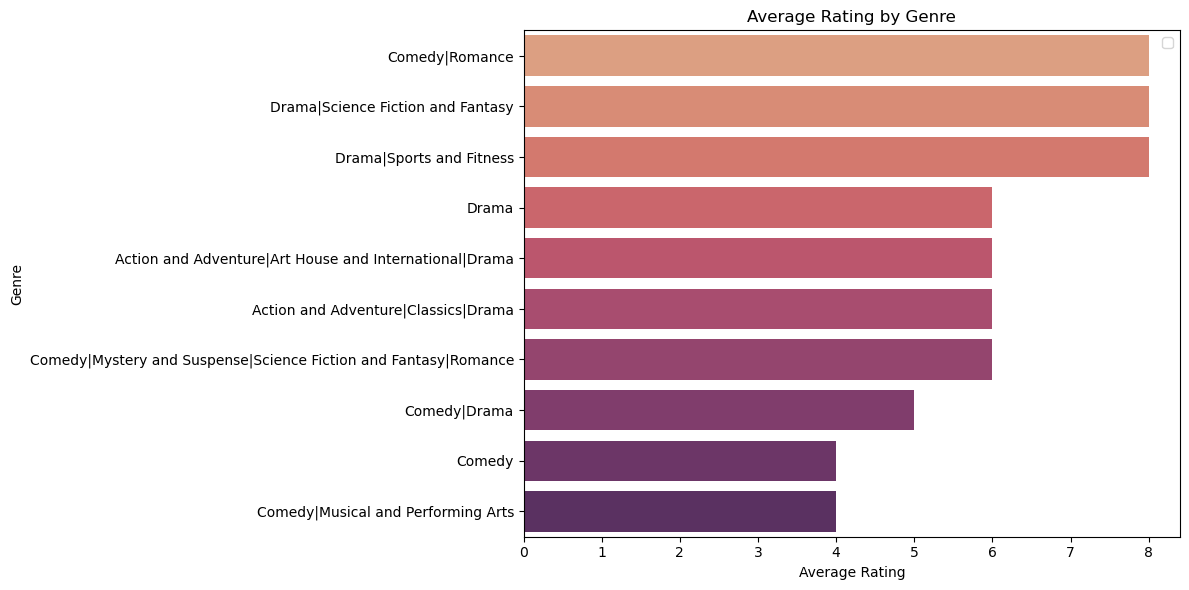

In [ ]:
# Visualize rating by genre
plt.figure(figsize=(12, 6))
sns.barplot(x= 'rating_x', y= 'genre', data= genre_rating, palette='flare')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.ticklabel_format(style= 'plain', axis=	'x')
plt.tight_layout()
plt.legend()
plt.show()

*Insights*
- Comedy|Romance, Drama|Science Fiction and Fantasy and Drama|Sports and Fitness have the highest rating
- Comedy and Comedy|Musical and Performing Arts have the lowest rating 

## Multivariate Analysis


This is used to measure the effect of multiple independent variables on two or more dependent variables

In [70]:
# view the data types
merged_df.dtypes

id                     int64
review                object
rating_x             float64
fresh                 object
critic                object
top_critic             int64
publisher             object
date                  object
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
synopsis              object
rating_y              object
genre                 object
director              object
writer                object
theater_date          object
dvd_date              object
runtime                int64
dtype: object

In [71]:
# Drop non-numeric columns
numeric_merged_df =merged_df.select_dtypes(include=['number'])

# Find the correlation matrix
corr_matrix = numeric_merged_df.corr()

# show the matrix
corr_matrix

,id,rating_x,top_critic,production_budget,domestic_gross,worldwide_gross,runtime
id,1.000000,-0.147273,0.008626,-0.034128,0.023191,-0.015593,0.186145
rating_x,-0.147273,1.000000,0.190416,0.008813,-0.030479,-0.020788,0.164073
top_critic,0.008626,0.190416,1.000000,-0.002128,0.001503,0.001584,0.306050
production_budget,-0.034128,0.008813,-0.002128,1.000000,0.647296,0.713820,-0.007961
domestic_gross,0.023191,-0.030479,0.001503,0.647296,1.000000,0.945277,0.001155
worldwide_gross,-0.015593,-0.020788,0.001584,0.713820,0.945277,1.000000,-0.008435
runtime,0.186145,0.164073,0.306050,-0.007961,0.001155,-0.008435,1.000000


## Plot a heatmap for the correlation matrix

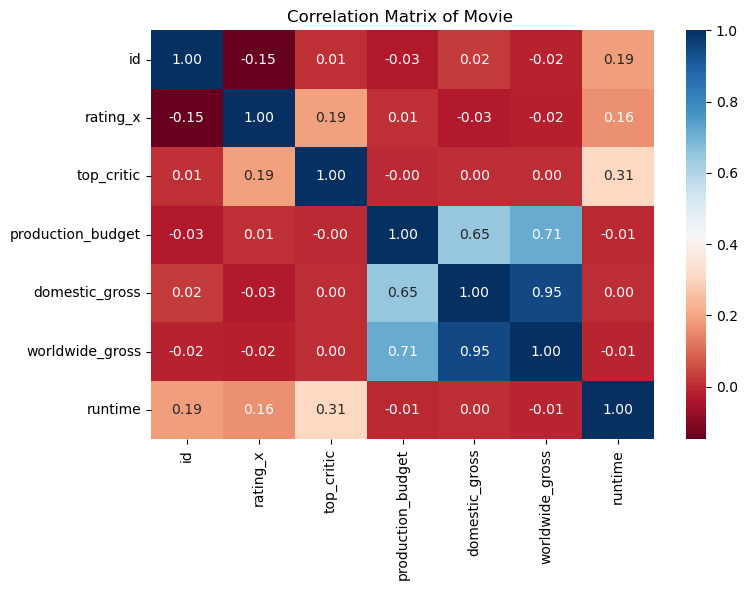

<Figure size 640x480 with 0 Axes>

In [72]:
# Plot a heatmap to show the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap= 'RdBu', fmt='.2f')
plt.title('Correlation Matrix of Movie ')
plt.tight_layout()
plt.show()
plt.savefig('correlation_heatmap.png')

*Insights*
* There is a strong positive correlation between Domestic gross and worldwide gross
* Another strong positive correlation between production budget and worldwide gross
 -- means that high production budget leads to  high worldwide gross
* Weak negative correlation between rating and production budget and worldwide gross

### Interpretation
* Production budget affects both domestic gross and worlwide gross
* Runtime is slightly criticised

## Conclusion

* Drama has the highest views and ratings however Drama also has lowest revenue gross
* Combined movie genre require less production budgets than single genres
* Art House and international and  Comedy|Musical had highest worldwide gross
* The higher the domestic gross the higher the worldwide gross 
* The higher the production budgets the higher gross for both domestic and worldwide
* Optimal movie runtime is < 120 minutes

## Recommendations

1. Produce movies from drama/ comedy/ action/ adventure genre for better results, increase ticket costs for higher revenue gross and tame movie piracy in this genre after production.

2. Focus on production of combined genres, specifically the combined genre with highest views such as Comedy|Drama|Adventure and focus on movies with a runtime of 90 - 130 minutes.

3. Invest adequately in marketing and movie promotion locally i.e movie premiers and trailers to maximize success in the global scene. 


### You may also consider :

* Allocating higher budgets for movie production while factoring in other aspects like genres, runtime and ratings for higher returns.
* Producing Art House and international comedy/ drama and Musical and perfoming arts for higher global revenue.